Convergence studies

Generating reference solution with h=0.001...
{}
Reference solution generated.
Running RK15 with h=0.05 using 2 optimized registers...
{}
h=0.05: Error=1.959407080025031e-05, Iterations=200, Time=0.913356s, Memory=62120 bytes
Running RK15 with h=0.049 using 2 optimized registers...
{}
h=0.049: Error=1.8403409983389824e-05, Iterations=205, Time=0.878536s, Memory=63515 bytes
Running RK15 with h=0.048 using 2 optimized registers...
{}
h=0.048: Error=1.7264505038279588e-05, Iterations=209, Time=1.564146s, Memory=64592 bytes
Running RK15 with h=0.047 using 2 optimized registers...
{}
h=0.047: Error=1.617589165745485e-05, Iterations=213, Time=1.410353s, Memory=65564 bytes
Running RK15 with h=0.046 using 2 optimized registers...
{}
h=0.046: Error=1.5136142809576285e-05, Iterations=218, Time=0.944660s, Memory=66892 bytes
Running RK15 with h=0.045000000000000005 using 2 optimized registers...
{}
h=0.045000000000000005: Error=1.4143866212221432e-05, Iterations=223, Time=0.960988s, Memory=67698 b

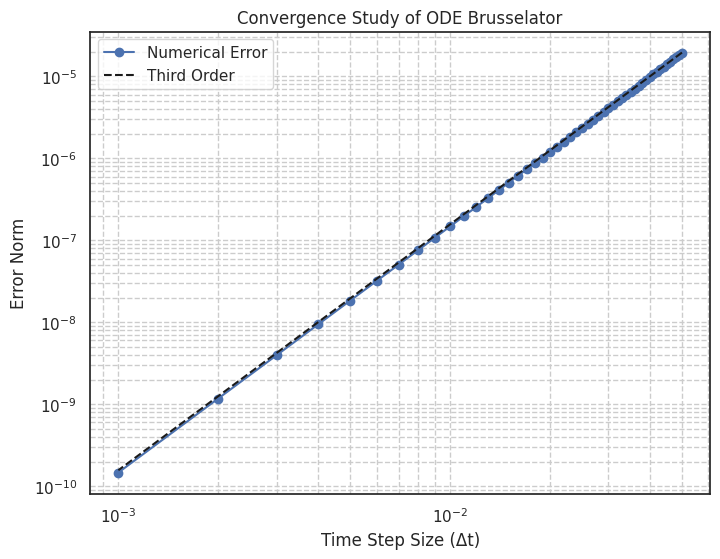

In [35]:
import numpy as np
import time
import tracemalloc
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

#Coeffients from the checker.py

print("<=======a[1,0]= b[9]**2=========>")
a = np.array([
     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ,
     [0.010353192801789424, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ,
     [0.008280757658519874, 0.018426173311949567, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ,
     [0.008280757658516777, 0.002174367105545582, 0.08945178978973779, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ,
     [0.008280757658517544, 0.002174367105545582, 0.07643173141094187, 0.06226488983359442, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ,
     [0.008280757658517612, 0.002174367105545582, 0.076431731410942, 0.06334091240572876, 0.8562323712883272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ,
     [0.008280757658517617, 0.002174367105545582, 0.07643173141094202, 0.06334091240572877, 0.002591265543602608, 0.017975957081130277, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ,
     [0.008280757658517615, 0.002174367105545582, 0.07643173141094202, 0.06334091240572878, 0.0025912655436026227, 0.14161013638303202, 0.05142119302314059, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ,
     [0.008280757658517615, 0.002174367105545582, 0.07643173141094202, 0.06334091240572878, 0.0025912655436026244, 0.14161013638303271, 0.10349471367071784, 0.26792383586784135, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ,
     [0.008280757658517617, 0.002174367105545582, 0.07643173141094202, 0.06334091240572878, 0.0025912655436026205, 0.14161013638303244, 0.10349471367071848, 0.01984989687226824, 0.0011165786582949845, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ,
     [0.008280757658517617, 0.002174367105545582, 0.07643173141094202, 0.06334091240572878, 0.002591265543602629, 0.14161013638303252, 0.10349471367071783, 0.01984989687226726, 0.0014129782238071545, 0.03822375214425407, 0.0, 0.0, 0.0, 0.0, 0.0] ,
     [0.008280757658517615, 0.002174367105545582, 0.07643173141094202, 0.06334091240572878, 0.0025912655436026158, 0.1416101363830327, 0.10349471367071791, 0.019849896872267132, 0.0014129782238071545, 0.10175064030162033, 0.32630116794911007, 0.0, 0.0, 0.0, 0.0] ,
     [0.008280757658517615, 0.002174367105545582, 0.07643173141094202, 0.06334091240572878, 0.0025912655436026158, 0.14161013638303274, 0.10349471367071782, 0.01984989687226683, 0.0014129782238071545, 0.10175064030162027, 0.009700146915903611, 0.005291858529276196, 0.0, 0.0, 0.0] ,
     [0.008280757658517615, 0.002174367105545582, 0.07643173141094202, 0.06334091240572878, 0.0025912655436026158, 0.14161013638303266, 0.10349471367071794, 0.019849896872267247, 0.0014129782238071545, 0.10175064030162032, 0.00970014691590373, 0.010359509728598209, 0.03778777617984478, 0.0, 0.0] ,
     [0.008280757658517615, 0.002174367105545582, 0.07643173141094202, 0.06334091240572878, 0.0025912655436026158, 0.14161013638303263, 0.10349471367071797, 0.01984989687226747, 0.0014129782238071545, 0.10175064030162041, 0.0097001469159039, 0.010359509728599557, 0.011683848518759808, 0.042170687897232204, 0.0] ,
])
b=[ 0.008280757658517615, 0.002174367105545582, 0.07643173141094202,
    0.06334091240572878, 0.0025912655436026158, 0.1416101363830327,
    0.10349471367071791, 0.019849896872267153, 0.0014129782238071545,
    0.10175064030162038, 0.009700146915903948, 0.010359509728599225,
    0.011683848518759752, 0.3094709876769489, 0.13784810758400443
]

a_values = np.array(a)
b_values = np.array(b)

# Kahan summation for improved floating-point precision
def kahan_sum(values):
    sum_ = np.float128(0.0)
    compensation = np.float128(0.0)
    for value in values:
        y = value - compensation
        temp = sum_ + y
        compensation = (temp - sum_) - y
        sum_ = temp
    return sum_

# 1D Brusselator ODE function
def brusselator_2d(t, y):
    x, y_ = y
    a, b = 1.0, 1.0  # Example parameters for the Brusselator
    dx_dt = a - (b + 1) * x + x**2 * y_
    dy_dt = b * x - x**2 * y_
    return np.array([dx_dt, dy_dt], dtype=np.float128)

# Runge-Kutta integration with optimized low storage (2 Registers)
def rk15_low_storage_2_registers_optimized(f, t_span, y0, h, a_values, b):
    t0, tf = t_span
    t = np.float128(t0)
    y = y0.copy()
    t_values = [t0]
    y_values = [y.copy()]

    s = len(b)
    num_steps = int(np.ceil((tf - t0) / h))
    c = np.array([kahan_sum(a_values[i][:i]) for i in range(s)], dtype=np.float128)

    # Determine the last usage of each k_j
    last_usage = [0] * s
    for j in range(s):
        for i in reversed(range(s)):
            if a_values[i][j] != 0:
                last_usage[j] = i
                break

    # Initialize two registers
    R1 = np.zeros_like(y, dtype=np.float128)
    R2 = np.zeros_like(y, dtype=np.float128)

    # Track which k_j is stored in which register
    register1_kj = None
    register2_kj = None

    # Temporary storage for k_j that cannot be stored in registers
    temp_k = {}
    print(temp_k)
    for step in range(num_steps):
        sum_bF = np.zeros_like(y, dtype=np.float128)

        for i in range(s):
            y_stage = y.copy()

            for j in range(i):
                # Retrieve k_j from registers or temporary storage
                if j in temp_k:
                    k_j = temp_k[j]
                elif j == register1_kj:
                    k_j = R1
                elif j == register2_kj:
                    k_j = R2
                else:
                    raise ValueError(f"k_{j+1} is needed but not stored.")

                y_stage += h * a_values[i][j] * k_j

            t_stage = t + c[i] * h
            k_new = f(t_stage, y_stage)

            # Determine which register can be overwritten
            overwrite_j = []
            if register1_kj is not None and last_usage[register1_kj] <= i:
                overwrite_j.append(register1_kj)
            if register2_kj is not None and last_usage[register2_kj] <= i:
                overwrite_j.append(register2_kj)

            if overwrite_j:
                # Assign k_new to the first available register that can be overwritten
                j_to_overwrite = overwrite_j[0]
                if j_to_overwrite == register1_kj:
                    R1 = k_new.copy()
                    register1_kj = i
                elif j_to_overwrite == register2_kj:
                    R2 = k_new.copy()
                    register2_kj = i
            else:
                # Assign k_new to a register if available
                if register1_kj is None:
                    R1 = k_new.copy()
                    register1_kj = i
                elif register2_kj is None:
                    R2 = k_new.copy()
                    register2_kj = i
                else:
                    # Both registers are occupied; store in temporary storage
                    temp_k[i] = k_new.copy()

            # Accumulate the weighted derivative
            sum_bF += b[i] * k_new

        # Update the solution
        y += h * sum_bF
        t += h
        t_values.append(t)
        y_values.append(y.copy())
        #print(temp_k)
        # Clear temporary storage for next step
        temp_k.clear()

    return np.array(t_values, dtype=np.float128), np.array(y_values, dtype=np.float128)

# L2 norm error calculation
def l2_norm_error(y_numerical, y_reference):
    error = y_numerical - y_reference
    l2_norm = np.linalg.norm(error, axis=1)
    return np.sqrt(np.mean(l2_norm**2, dtype=np.float128))

# Function to calculate order of convergence
def calculate_order_of_convergence(errors, hs):
    orders = []
    for i in range(1, len(errors)):
        if errors[i-1] == 0:
            orders.append(np.nan)
        else:
            order = np.log(errors[i] / errors[i-1]) / np.log(hs[i] / hs[i-1])
            orders.append(order)
    return orders

# Interpolate solution for error calculation
def interpolate_solution(t_values, y_values, t_values_ref):
    y_interpolated = []
    for i in range(y_values.shape[1]):
        f_interp = interp1d(t_values, y_values[:, i], kind='cubic', fill_value="extrapolate")
        y_interpolated.append(f_interp(t_values_ref))
    return np.array(y_interpolated).T

if __name__ == "__main__":
    # Parameters for convergence study
    t_span = (0, 10)  # Simulate over a longer time to observe Brusselator dynamics
    y0 = np.array([1.2, 2.5], dtype=np.float128)  # Initial conditions for Brusselator
    errors = []
    hs = np.linspace(0.05, 0.001, 50)  # Different time step sizes
    iterations_list = []
    memory_usage = []
    computation_times = []

    # Generate the reference solution with high precision using full storage
    print("Generating reference solution with h=0.001...")
    t_values_ref, y_values_ref = rk15_low_storage_2_registers_optimized(
        brusselator_2d, t_span, y0, 0.00001, a_values, b_values)
    print("Reference solution generated.")

    for h in hs:
        print(f"Running RK15 with h={h} using 2 optimized registers...")
        # Start memory tracking
        tracemalloc.start()

        # Start time measurement
        start_time = time.time()

        # Run numerical method
        t_values, y_values = rk15_low_storage_2_registers_optimized(
            brusselator_2d, t_span, y0, h, a_values, b_values)

        # Record computation time and memory usage
        computation_times.append(time.time() - start_time)
        current, peak = tracemalloc.get_traced_memory()
        memory_usage.append(peak)  # Peak memory usage
        tracemalloc.stop()

        # Interpolate solution
        y_values_interpolated = interpolate_solution(t_values, y_values, t_values_ref)

        # Calculate L2 norm error
        error = l2_norm_error(y_values_interpolated, y_values_ref)
        errors.append(error)
        iterations_list.append(len(t_values) - 1)  # Number of iterations

        print(f"h={h}: Error={error}, Iterations={len(t_values)-1}, Time={computation_times[-1]:.6f}s, Memory={peak} bytes")

    # Calculate order of convergence
    orders = calculate_order_of_convergence(errors, hs)

    # Print results
    print("\nRunge-Kutta 15 Method with Optimized Low Storage  on ODE Brusselator")
    print("Step sizes:", hs)
    print("Errors:", errors)
    print("Orders of convergence:", orders)
    print("Iterations per step size:", iterations_list)
    print("Computation times (s):", computation_times)
    print("Memory usage (bytes):", memory_usage)

    # Plotting the convergence
    plt.figure(figsize=(8,6))
    plt.loglog(hs, errors, 'o-', label='Numerical Error')
    plt.loglog(hs, [errors[0]*(h/hs[0])**3 for h in hs], 'k--', label='Third Order')
    plt.xlabel('Time Step Size (Δt)')
    plt.ylabel('Error Norm')
    plt.title('Convergence Study of ODE Brusselator')
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.show()


<=======a[1,0]= b[9]**2=========>
Generating reference solution with h_ref=0.0001 ...
Reference solution generated.

dt_nominal=0.01000 → dt_adj=0.01000 (N_steps=1000)
  error=1.03e-05, steps=1000, time=10.126s, peak_mem=6678946
dt_nominal=0.00992 → dt_adj=0.00992 (N_steps=1008)
  error=1.01e-05, steps=1008, time=10.245s, peak_mem=6731427
dt_nominal=0.00985 → dt_adj=0.00985 (N_steps=1015)
  error=9.88e-06, steps=1015, time=9.299s, peak_mem=6777600
dt_nominal=0.00977 → dt_adj=0.00978 (N_steps=1023)
  error=9.66e-06, steps=1023, time=10.195s, peak_mem=6830197
dt_nominal=0.00970 → dt_adj=0.00970 (N_steps=1031)
  error=9.43e-06, steps=1031, time=10.502s, peak_mem=6883074
dt_nominal=0.00962 → dt_adj=0.00962 (N_steps=1039)
  error=9.22e-06, steps=1039, time=10.496s, peak_mem=6935724
dt_nominal=0.00955 → dt_adj=0.00954 (N_steps=1048)
  error=8.99e-06, steps=1048, time=10.514s, peak_mem=6994714
dt_nominal=0.00947 → dt_adj=0.00947 (N_steps=1056)
  error=8.78e-06, steps=1056, time=10.239s, peak_

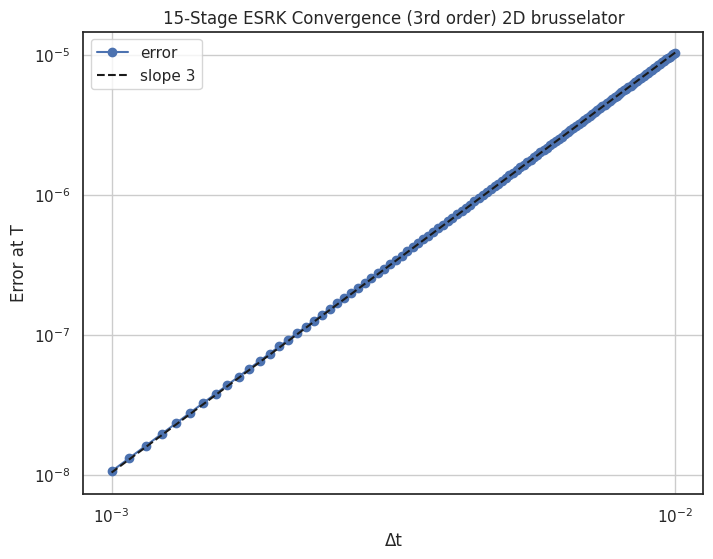

In [36]:
#!/usr/bin/env python3

import numpy as np
import time
import tracemalloc
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Configure NumPy to raise exceptions on floating-point errors
np.seterr(over='raise', invalid='raise', divide='raise', under='warn')

print("<=======a[1,0]= b[9]**2=========>")

###############################################################################
# 1) Kahan Summation (helper for c_i)
###############################################################################
def kahan_sum(values):
    """
    Kahan summation to improve numerical stability in summing a list of floats.
    Returns the sum as a float128.
    """
    sum_ = np.float128(0.0)
    compensation = np.float128(0.0)
    for value in values:
        y = np.float128(value) - compensation
        temp = sum_ + y
        compensation = (temp - sum_) - y
        sum_ = temp
    return sum_

###############################################################################
# 2) The 1D Brusselator PDE ODE Right-Hand Side with 21 stage ESRK
###############################################################################
def brusselator_1d(t, y, N, dx, D_u, D_v, a_param, b_param):
    """
    1D Brusselator PDE with Neumann boundary conditions, discretized in space.
    """
    u = y[:N]
    v = y[N:]

    u_xx = np.zeros(N, dtype=np.float128)
    v_xx = np.zeros(N, dtype=np.float128)

    # Interior points
    u_xx[1:-1] = (u[2:] - 2*u[1:-1] + u[:-2]) / dx**2
    v_xx[1:-1] = (v[2:] - 2*v[1:-1] + v[:-2]) / dx**2

    # Neumann BC
    u_xx[0]  = (u[2]   - 2*u[1]   + u[0])   / dx**2
    v_xx[0]  = (v[2]   - 2*v[1]   + v[0])   / dx**2
    u_xx[-1] = (u[-1]  - 2*u[-2]  + u[-3])  / dx**2
    v_xx[-1] = (v[-1]  - 2*v[-2]  + v[-3])  / dx**2

    reaction_u = a_param - (b_param+1)*u + u**2 * v
    reaction_v = b_param*u - u**2 * v

    du_dt = D_u*u_xx + reaction_u
    dv_dt = D_v*v_xx + reaction_v

    return np.concatenate([du_dt, dv_dt])

###############################################################################
# 3) The 15-Stage ESRK Butcher Tableau (3rd-order) same as above
###############################################################################
a_21 = np.array([
     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ,
     [0.010353192801789424, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ,
     [0.008280757658519874, 0.018426173311949567, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ,
     [0.008280757658516777, 0.002174367105545582, 0.08945178978973779, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ,
     [0.008280757658517544, 0.002174367105545582, 0.07643173141094187, 0.06226488983359442, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ,
     [0.008280757658517612, 0.002174367105545582, 0.076431731410942, 0.06334091240572876, 0.8562323712883272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ,
     [0.008280757658517617, 0.002174367105545582, 0.07643173141094202, 0.06334091240572877, 0.002591265543602608, 0.017975957081130277, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ,
     [0.008280757658517615, 0.002174367105545582, 0.07643173141094202, 0.06334091240572878, 0.0025912655436026227, 0.14161013638303202, 0.05142119302314059, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ,
     [0.008280757658517615, 0.002174367105545582, 0.07643173141094202, 0.06334091240572878, 0.0025912655436026244, 0.14161013638303271, 0.10349471367071784, 0.26792383586784135, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ,
     [0.008280757658517617, 0.002174367105545582, 0.07643173141094202, 0.06334091240572878, 0.0025912655436026205, 0.14161013638303244, 0.10349471367071848, 0.01984989687226824, 0.0011165786582949845, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] ,
     [0.008280757658517617, 0.002174367105545582, 0.07643173141094202, 0.06334091240572878, 0.002591265543602629, 0.14161013638303252, 0.10349471367071783, 0.01984989687226726, 0.0014129782238071545, 0.03822375214425407, 0.0, 0.0, 0.0, 0.0, 0.0] ,
     [0.008280757658517615, 0.002174367105545582, 0.07643173141094202, 0.06334091240572878, 0.0025912655436026158, 0.1416101363830327, 0.10349471367071791, 0.019849896872267132, 0.0014129782238071545, 0.10175064030162033, 0.32630116794911007, 0.0, 0.0, 0.0, 0.0] ,
     [0.008280757658517615, 0.002174367105545582, 0.07643173141094202, 0.06334091240572878, 0.0025912655436026158, 0.14161013638303274, 0.10349471367071782, 0.01984989687226683, 0.0014129782238071545, 0.10175064030162027, 0.009700146915903611, 0.005291858529276196, 0.0, 0.0, 0.0] ,
     [0.008280757658517615, 0.002174367105545582, 0.07643173141094202, 0.06334091240572878, 0.0025912655436026158, 0.14161013638303266, 0.10349471367071794, 0.019849896872267247, 0.0014129782238071545, 0.10175064030162032, 0.00970014691590373, 0.010359509728598209, 0.03778777617984478, 0.0, 0.0] ,
     [0.008280757658517615, 0.002174367105545582, 0.07643173141094202, 0.06334091240572878, 0.0025912655436026158, 0.14161013638303263, 0.10349471367071797, 0.01984989687226747, 0.0014129782238071545, 0.10175064030162041, 0.0097001469159039, 0.010359509728599557, 0.011683848518759808, 0.042170687897232204, 0.0] ,
])
b=[ 0.008280757658517615, 0.002174367105545582, 0.07643173141094202,
    0.06334091240572878, 0.0025912655436026158, 0.1416101363830327,
    0.10349471367071791, 0.019849896872267153, 0.0014129782238071545,
    0.10175064030162038, 0.009700146915903948, 0.010359509728599225,
    0.011683848518759752, 0.3094709876769489, 0.13784810758400443
]
b_21 = np.array(b)

###############################################################################
# 4) Generic ESRK Solver With 15 Stages with a[1,0] == b[9]**2
###############################################################################
def runge_kutta_21stage(f, t_span, y0, h, a_values, b_values, args=()):
    t0, tf = t_span
    t = np.float128(t0)
    y = y0.copy()
    t_values = [t0]
    y_values = [y.copy()]

    s = len(b_values)
    num_steps = int(np.ceil((tf - t0) / h))

    c_values = np.array([kahan_sum(a_values[i, :i]) for i in range(s)], dtype=np.float128)
    k_stages = [np.zeros_like(y, dtype=np.float128) for _ in range(s)]

    for _ in range(num_steps):
        if t + h > tf:
            h = tf - t
        if h <= 0:
            break

        for i in range(s):
            yi = y.copy()
            for j in range(i):
                if a_values[i,j] != 0:
                    yi += h * a_values[i,j] * k_stages[j]
            ti = t + c_values[i]*h
            k_stages[i] = f(ti, yi, *args)

        for i in range(s):
            if b_values[i] != 0:
                y += h * b_values[i] * k_stages[i]

        t += h
        t_values.append(t)
        y_values.append(y.copy())
        if t >= tf:
            break

    return np.array(t_values, dtype=np.float128), np.array(y_values, dtype=np.float128)

###############################################################################
# 8) Main Demo
###############################################################################
if __name__ == "__main__":
    # Problem setup
    t_span = (0.0, 10.0)
    L = 10.0
    N = 100
    x = np.linspace(0, L, N)
    dx = x[1] - x[0]
    D_u, D_v = 0.1, 0.05
    a_param, b_param = 1.0, 3.0

    np.random.seed(0)
    y0 = np.concatenate([
        a_param + 0.1*np.random.rand(N),
        b_param/a_param + 0.1*np.random.rand(N)
    ]).astype(np.float128)

    # Reference solution
    h_ref = 1e-4
    print(f"Generating reference solution with h_ref={h_ref} ...")
    t_ref, y_ref = runge_kutta_21stage(
        brusselator_1d, t_span, y0, h_ref, a_21, b_21,
        args=(N, dx, D_u, D_v, a_param, b_param)
    )
    print("Reference solution generated.\n")

    # Convergence study
    hs = np.linspace(0.01, 0.001, 120)
    errors = []
    times = []
    mems = []
    steps = []

    T = t_span[1] - t_span[0]

    for h in hs:
        # force integer number of steps
        N_steps = int(round(T / h))
        h_adj   = T / N_steps
        print(f"dt_nominal={h:.5f} → dt_adj={h_adj:.5f} (N_steps={N_steps})")

        tracemalloc.start()
        t0 = time.time()

        t_vals, y_vals = runge_kutta_21stage(
            brusselator_1d, t_span, y0, h_adj, a_21, b_21,
            args=(N, dx, D_u, D_v, a_param, b_param)
        )

        dt = time.time() - t0
        current, peak = tracemalloc.get_traced_memory()
        tracemalloc.stop()

        # direct endpoint error
        err = np.linalg.norm(y_vals[-1] - y_ref[-1], ord=2)

        errors.append(err)
        times.append(dt)
        mems.append(peak)
        steps.append(len(t_vals)-1)

        print(f"  error={err:.2e}, steps={steps[-1]}, time={dt:.3f}s, peak_mem={peak}")

    # Plot
    plt.figure(figsize=(8,6))
    plt.loglog([T/s for s in steps], errors, 'o-', label='error')
    # reference slope-3 line
    c0 = errors[0] / ( (T/steps[0])**3 )
    ref_line = [c0*( (T/s)**3 ) for s in steps]
    plt.loglog([T/s for s in steps], ref_line, 'k--', label='slope 3')

    plt.xlabel("Δt")
    plt.ylabel("Error at T")
    plt.title("15-Stage ESRK Convergence (3rd order) 2D brusselator")
    plt.legend()
    plt.grid(True)
    plt.show()
